In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

TSdata = sm.datasets.co2.load_pandas()
# TSco2Test = TSdata.data

TypeError: __new__() got an unexpected keyword argument 'format'

In [2]:
y = TSco2Test['co2'].resample('MS').mean()
y.isnull().sum()
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.400000


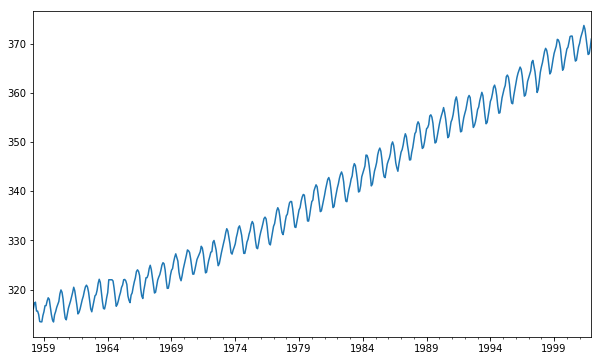

In [3]:
y = y.fillna(y.bfill())#fill in the None data with its next data
y
y.plot(figsize=(10, 6))
plt.show()

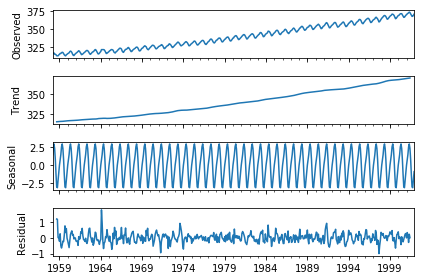

In [4]:
deco = sm.tsa.seasonal_decompose(y, model='additive')
fig = deco.plot()
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


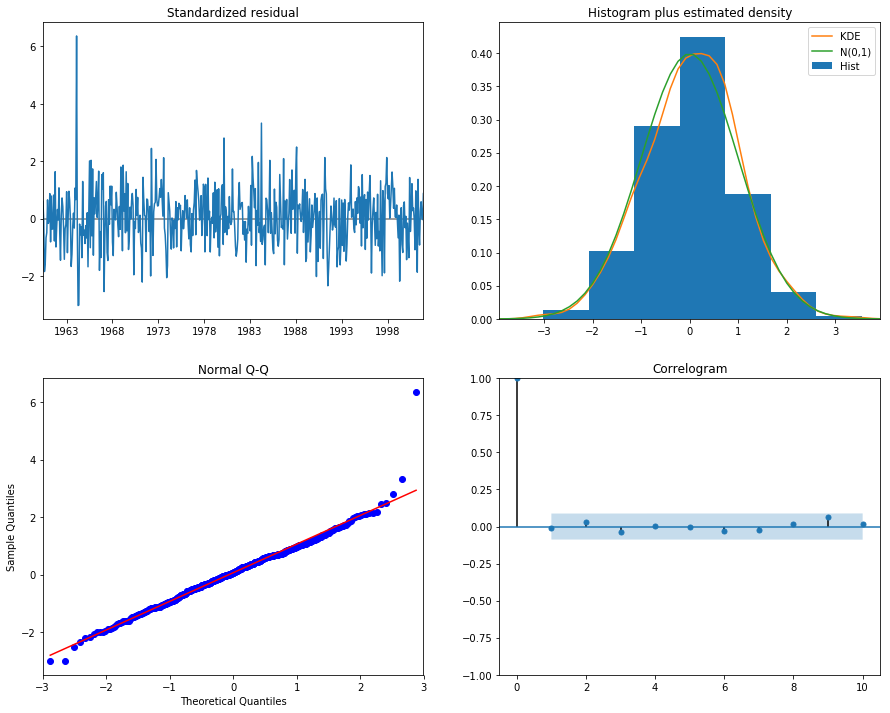

In [5]:
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

# order: 
# The (p,d,q) order of the model for the number of AR parameters, differences, 
# and MA parameters. d must be an integer indicating the integration order of the process, 
# while p and q may either be an integers indicating the AR and MA orders

# seasonal_order=(1, 1, 1, 12):
# s is an integer giving the periodicity (number of periods in season), 
# often it is 4 for quarterly data or 12 for monthly data.
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)# one jie arima model
TSresults = mod.fit()
print(TSresults.summary().tables[1])
TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()


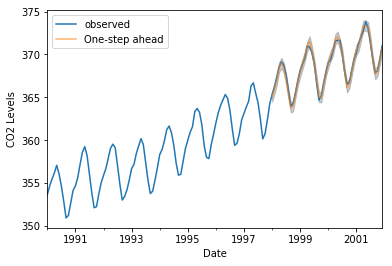

In [6]:
pred = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the value, effect of the constraint.
#http://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.PredictionResults.conf_int.html?highlight=pred%20conf_int#statsmodels.genmod.generalized_linear_model.PredictionResults.conf_int
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2) #nparray.iloc is getting index

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()
